# How do Indians Vote?

# Introduction to the analysis

India is a country, divided into states and union territories, with a parliamentary system governed under the Constitution of India, which defines the power distribution among the federal government and the states.
Election Commission is a federal body, enacted under the provisions of the Constitution, responsible for monitoring and administering all the electoral processes of India. This body is responsible for ensuring elections are free and fair, without any bias

**The Analysis here is based on the election to Lok Sabha (The General Elections) for the year 2019**
Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers. The house meets in the Lok Sabha Chambers of the Sansad Bhavan in New Delhi, on matters relating to creation of new laws, removing or improving the existing laws that affect all citizens of India. 

# Presenting an view before going into the Analysis

![](https://upload.wikimedia.org/wikipedia/commons/c/c2/Indian_General_Election_2019.svg)

# Importing the dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
#classwordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)[source]
#Word cloud object for generating and drawing.
#classwordcloud.ImageColorGenerator(image, default_color=None)[source]
#Color generator based on a color image.

#Generates colors based on an RGB image. A word will be colored using the mean color of the enclosing rectangle in the color image.

#After construction, the object acts as a callable that can be passed as color_func to the word cloud constructor or to the recolor method.

from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx
/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv


# # Lets Check out the data

In [2]:
vote=pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


# To help our Analysis, lets go for some...

![](https://miro.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg)

**Identifying the Null values in the columns**

In [3]:
vote.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

**Identifying the null entries in the data**

In [4]:
vote[vote.SYMBOL.isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

**Cleaning up the Assets and Liabilities columns**

In [5]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


**Renaming the columns**

In [6]:
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


**Cleaning up the Educational Qualification of the election contestants**

In [7]:
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [8]:
vote.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

**Identifying the Data Type of the columns**

In [9]:
vote.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

**Identifying Discrepancy entries in the columns**

In [10]:
vote[vote['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


**Updating the data types for the analysis**

In [11]:
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

# The Analysis

# State and Constituency Level Analysis

# What is the distribution of Constituencies over all the states?

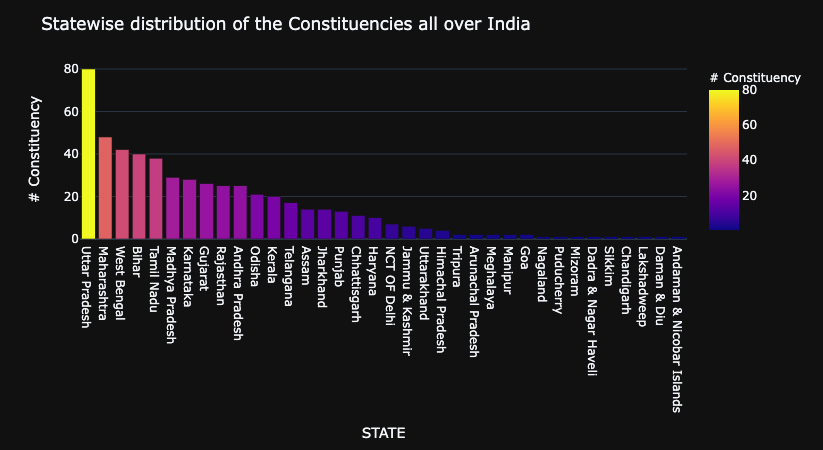

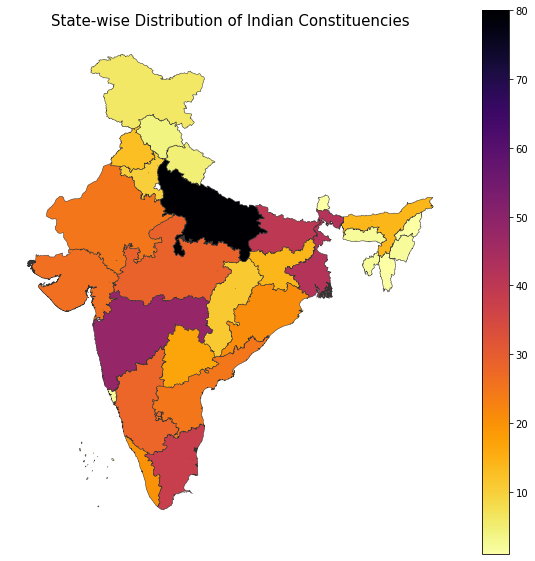

In [12]:
st_con=vote.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='# Constituency')
shp_gdf = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
merged = shp_gdf.set_index('st_nm').join(st_con.set_index('STATE'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
st_con.sort_values(by='# Constituency',ascending=False,inplace=True)
fig2 = px.bar(st_con, x='STATE', y='# Constituency',
                     color='# Constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',template='plotly_dark')
fig2.show()

**Observation** Uttar Pradesh, Maharashtra and West Bengal- The sates have the most number of constituencies. There exists a direct relationship of count of constituencies and population- The constituencies are divided based on the population of 1971- and this shall remain till the year 2026. Although currently Bihar has a higher population, West Bengal has the 3rd highest constituency count based on the above fact.

# Lets create a Sunburst image of all the States and Constituencies

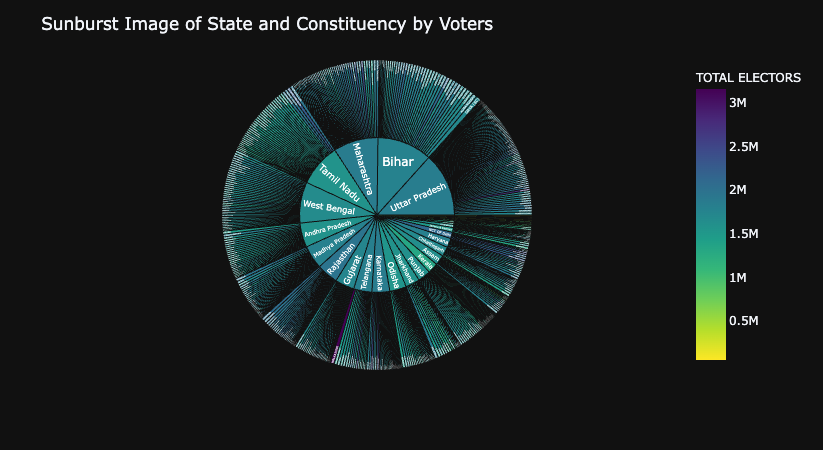

In [13]:
st_con_vt=vote[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
fig = px.sunburst(st_con_vt, path=['STATE','CONSTITUENCY'], values='TOTAL ELECTORS',
                  color='TOTAL ELECTORS',
                  color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image of State and Constituency by Voters',template='plotly_dark')
fig.show()

# Party Level Analysis

# Which Parties have been present in most constituencies and States?

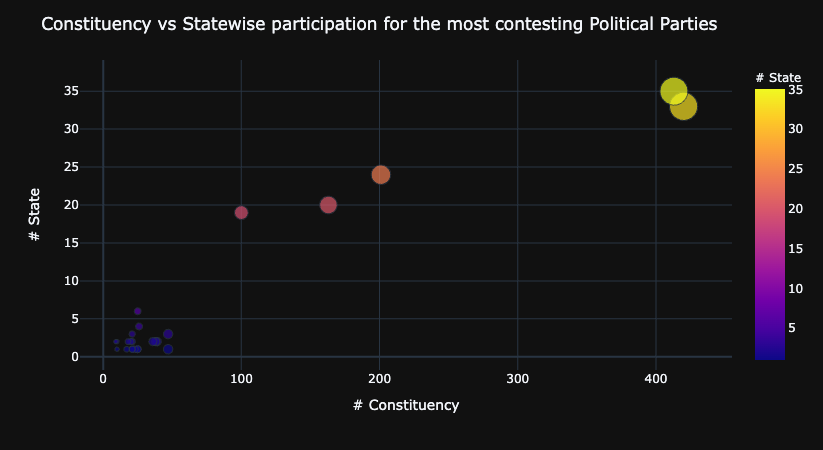

In [14]:
vote_prty=vote[vote['PARTY']!='NOTA']
prty_cnt=vote_prty.groupby('PARTY').apply(lambda x:x['CONSTITUENCY'].count()).reset_index(name='# Constituency')
prty_st=vote_prty.groupby('PARTY').apply(lambda x:x['STATE'].nunique()).reset_index(name='# State')
prty_cnt.sort_values(by='# Constituency',ascending=False,inplace=True)
prty_top_cn=prty_cnt[:25]
prty_top_all=pd.merge(prty_top_cn,prty_st,how='inner',left_on='PARTY',right_on='PARTY')
fig = px.scatter(prty_top_all, x='# Constituency', y='# State', color='# State',
                 size='# Constituency', hover_data=['PARTY'])
fig.update_layout(title_text='Constituency vs Statewise participation for the most contesting Political Parties',template='plotly_dark')
fig.show()

**Observation** The Bharatiya Janata Party (BJP) and Indian National Congress (INC) have participated in the most number of constituencies all over India. While BJP leads in the number of constituency contested, INC wins in terms of the number of States. While these are the major parties to contest almost all over India, we see the rest of the parties have restricted themselves to a handfull of states.

# Which party has won the most constituencies?

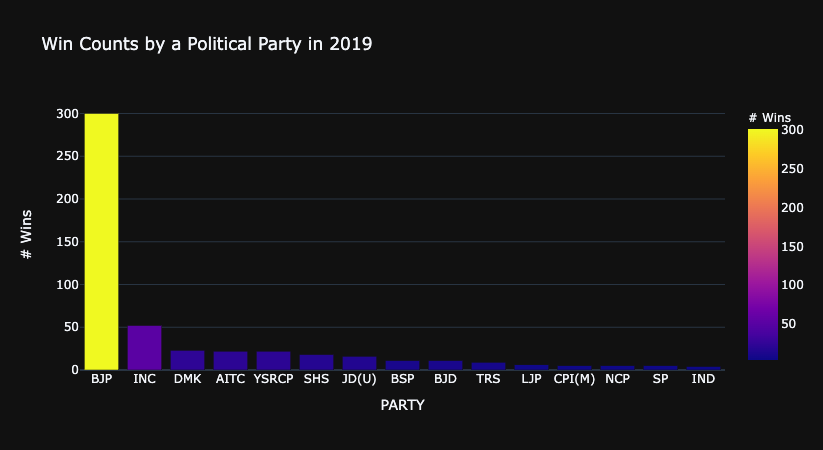

In [16]:
part_win=vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
top_part_win=part_win[0:15]
fig = px.bar(top_part_win, x='PARTY', y='# Wins',
                     color='# Wins',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Win Counts by a Political Party in 2019',template='plotly_dark')
fig.show()

**Observation** As seen from the data, In 2019, BJP has won the maximum constituencies all over India. The Image below the introduction also suggests the same. The distribution of all the parties is presented below. INC, who stood 2nd in the number of victories had only 52, which is practically 1/6th of the constituencies won by BJP

# Politician Level Analytics

# What is the Gender Ratio of the Contestants? Also the Gender Ratio of the Winners?

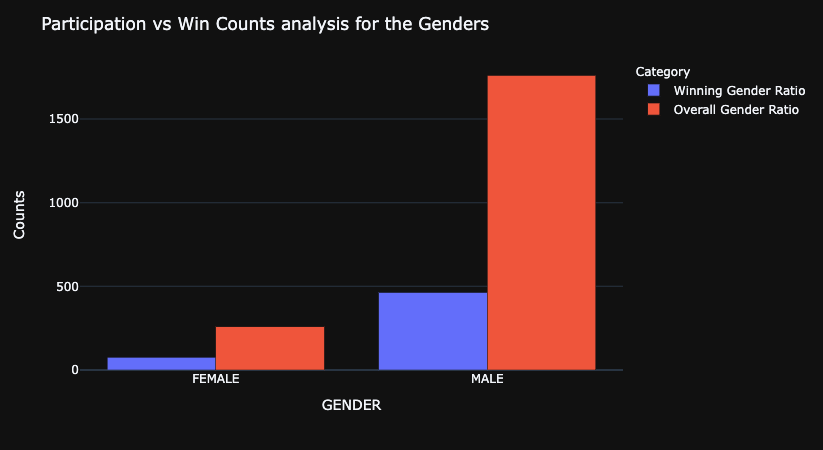

In [18]:
vote_gndr=vote[vote['PARTY']!='NOTA']
gndr_overall=vote_gndr.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_overall['Category']='Overall Gender Ratio'
winners=vote_gndr[vote_gndr['WINNER']==1]
gndr_winner=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category']='Winning Gender Ratio'
gndr_overl_win=pd.concat([gndr_winner,gndr_overall])
fig = px.bar(gndr_overl_win, x='GENDER', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts analysis for the Genders',template='plotly_dark')
fig.show()

**Observation** Out of the total list of participants only 12.78% (258 out of 2018) are female politicians, while 87.21% (1760 out of 2018) are male. Upon considering the winners, 14.1% (76 out of 463) are female politicians, while 85.9% are male politicians. The Gender ratio is not very well distributed as can be seen from the above presentation.

# What is the relationship of Age and Politics?

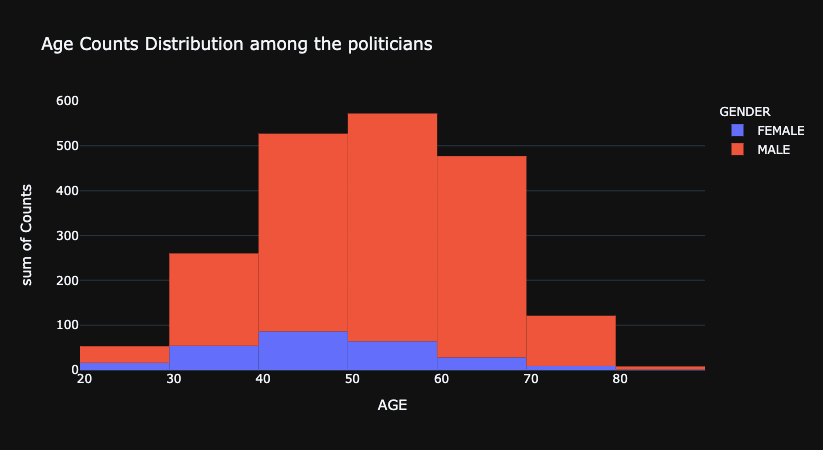

In [27]:
age_cnt=ed_valid.groupby(['AGE','GENDER']).apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(age_cnt, x="AGE",y='Counts',color='GENDER',title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the politicians',template='plotly_dark')
fig.show()

**Observation** Most Number of female politicians have their average age between 45-50, while for male politician, it ranges from 50-60 range. The average age of male politians is more as compared to female politicians contesting for the Lok Sabha elections.

# What relation does the Politician category have with the election results?

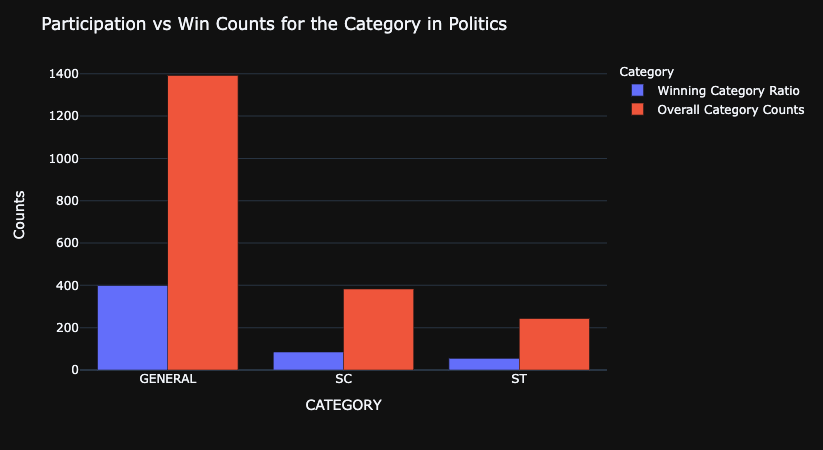

In [30]:
vote_cat=vote[vote['PARTY']!='NOTA']
cat_overall=vote_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_overall['Category']='Overall Category Counts'
winners_cat=vote_gndr[vote_gndr['WINNER']==1]
cat_winner=winners_cat.groupby('CATEGORY').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
cat_winner['Category']='Winning Category Ratio'
cat_overl_win=pd.concat([cat_winner,cat_overall])
fig = px.bar(cat_overl_win, x='CATEGORY', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts for the Category in Politics',template='plotly_dark')
fig.show()

**Observation** Both participation and winning wise ratio displays General category to be higher than SC and ST.

After analyzing the voting pattern of Indians, we have following conclusions. Let us look at them in the below points:

1. In 2019, the Bharatiya Janata Party (BJP) has claimed the most number of seats all over India- dominating clearly over all the national and the satte specific parties. The outreach created by them has really made them claim their position in the Lok Sabha.
2. The general paticipation of Female politicians is much less than the male politicians. A balanced gander ratio would be good enough- as people from all sectors would be able to contribute to the progress of the society.
3. The average age of polticians is high. It might be an advantage if younger politicians contest and are able to lead the nation. Altough is is never a parameter to think that the older politicians wouldn't be able to perform their tasks well- but it comes with the risk of health and age related issues.
